In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import copy
import seaborn as sns
import tensorflow as tf

"Imported successfully!"


'Imported successfully!'

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "dew_pt_temp", "radiation", "rain", "snow",]
data_frame = pd.read_csv("data.csv").drop(["Date", "Holiday", "Seasons", "Visibility", "Wind speed", "Functioning Day"], axis=1)

In [3]:
data_frame.head()

,Rented Bike Count,Hour,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall
0,254,0,-5.2,37,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,-18.6,0.0,0.0,0.0


In [4]:
data_frame.columns = dataset_cols
data_frame = data_frame[data_frame["hour"] == 12]
data_frame = data_frame.drop(["hour"], axis=1)

In [5]:
data_frame.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


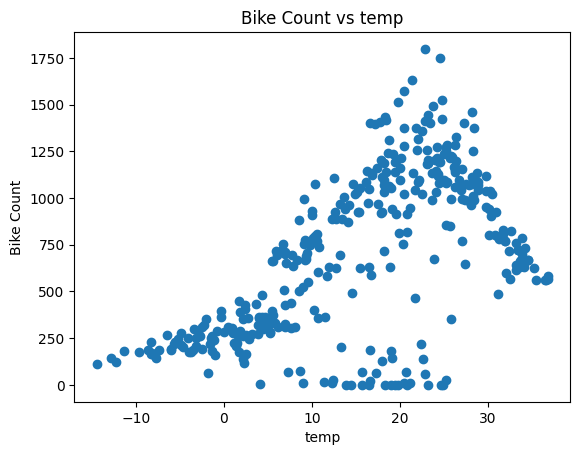

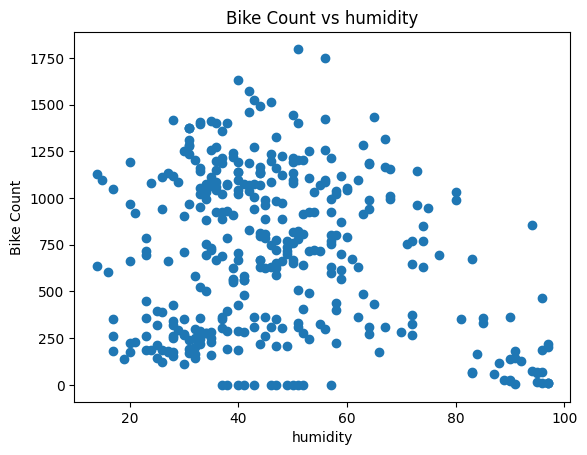

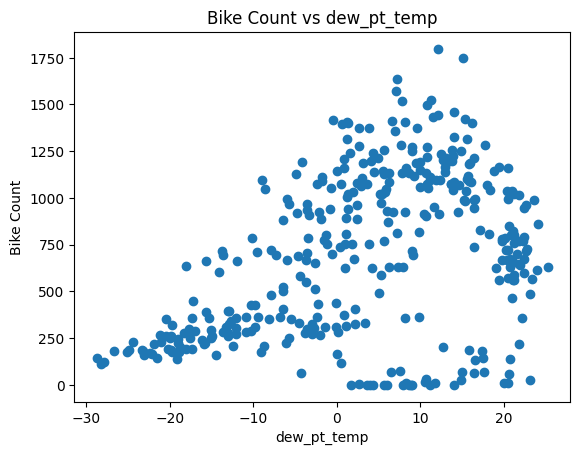

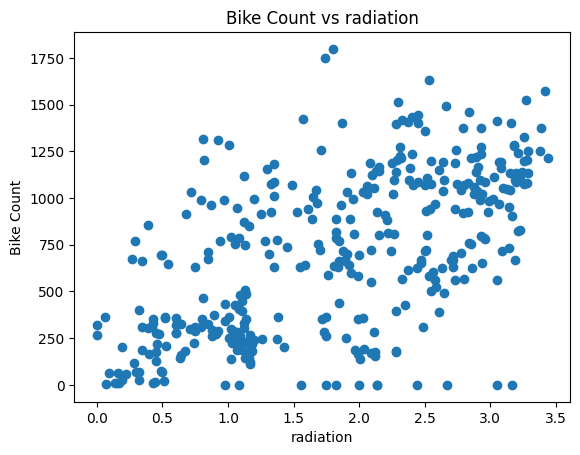

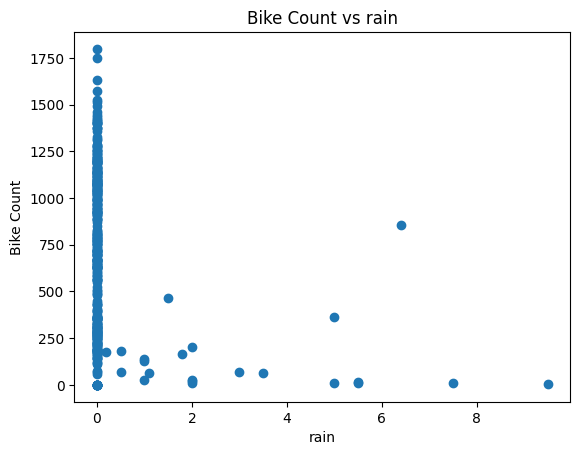

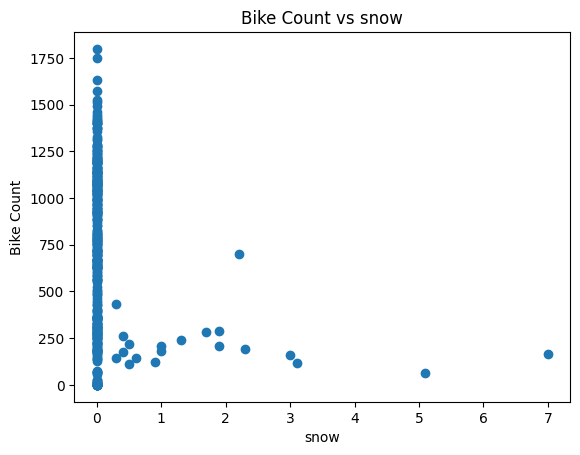

In [6]:
for label in data_frame.columns[1:]:
    plt.scatter(data_frame[label], data_frame["bike_count"])
    plt.title("Bike Count vs " + label)
    plt.xlabel(label)
    plt.ylabel("Bike Count")
    plt.show()
    

In [7]:
data_frame.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [8]:
data_frame.drop(["rain", "snow"], axis=1, inplace=True)
data_frame.head()

,bike_count,temp,humidity,dew_pt_temp,radiation
12,449,1.7,23,-17.2,1.11
36,479,4.3,41,-7.8,1.09
60,333,5.8,85,3.4,0.43
84,393,-0.3,38,-12.9,1.11
108,321,-2.3,25,-19.7,0.00


# Train, Valid & Test Split

In [9]:
train, valid, test = np.split(data_frame.sample(frac=1), [int(.6*len(data_frame)), int(.8*len(data_frame))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    Y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, Y))

    return data, X, Y

In [11]:
_, X_train_temp, Y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, Y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, Y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [13]:
temp_regression = LinearRegression()
temp_regression.fit(X_train_temp, Y_train_temp)

LinearRegression()

In [14]:
print(temp_regression.coef_, temp_regression.intercept_)

[[21.71601958]] [367.41006876]


In [15]:
temp_regression.score(X_test_temp, Y_test_temp)

0.2993114452897233

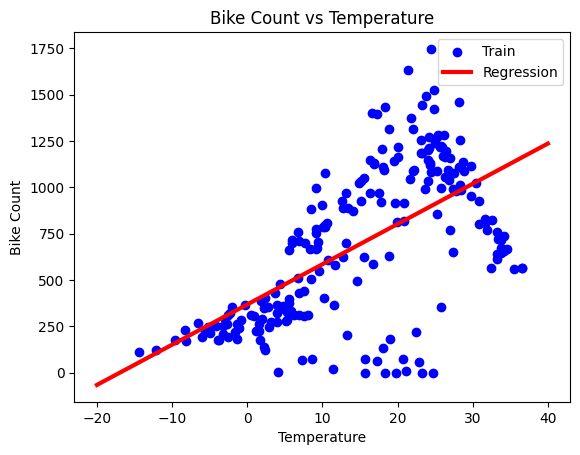

In [16]:
plt.scatter(X_train_temp, Y_train_temp, color="blue", label="Train")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regression.predict(np.array(x).reshape(-1,1)), color="red", label="Regression", linewidth=3)
plt.title("Bike Count vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.legend()
plt.show()


# Multiple Linear Regression

In [17]:
data_frame.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation'], dtype='object')

In [18]:
train, valid, test = np.split(data_frame.sample(frac=1), [int(.6*len(data_frame)), int(.8*len(data_frame))])

_, X_train_all, Y_train_all = get_xy(train, "bike_count", x_labels=data_frame.columns[1:])
_, X_valid_all, Y_valid_all = get_xy(valid, "bike_count", x_labels=data_frame.columns[1:])
_, X_test_all, Y_test_all = get_xy(test, "bike_count", x_labels=data_frame.columns[1:])

In [19]:
all_regression = LinearRegression()
all_regression.fit(X_train_all, Y_train_all)

LinearRegression()

In [20]:
all_regression.score(X_test_all, Y_test_all)

0.5535483379255801

In [21]:
Y_pred_lr = all_regression.predict(X_test_all)


# Regression with neural networks

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
all_normalizer = tf.keras.layers.Normalization(axis=None)
all_normalizer.adapt(X_train_all)

In [25]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [26]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [27]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [28]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [29]:
print(X_train_temp.shape)
print(Y_train_temp.shape)


(219, 1)
(219, 1)


In [30]:
print(X_train_all.shape)
print(Y_train_all.shape)

(219, 4)
(219, 1)


In [31]:
history = temp_nn_model.fit(
    X_train_temp,
    Y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid_temp, Y_valid_temp)
)


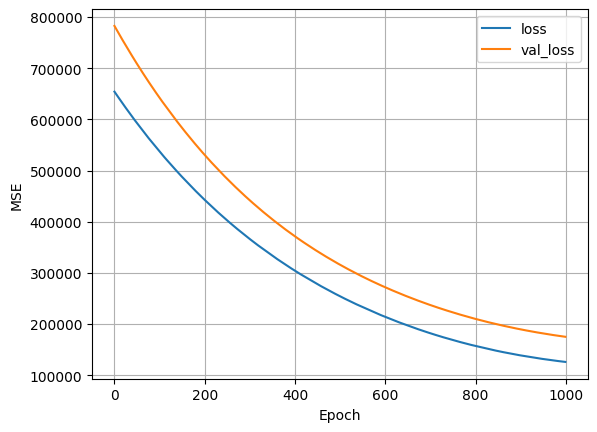

In [32]:
plot_loss(history)

In [33]:
all_history = all_nn_model.fit(
    X_train_all,
    Y_train_all,
    verbose=0,
    epochs=1000,
    validation_data=(X_valid_all, Y_valid_all)
)

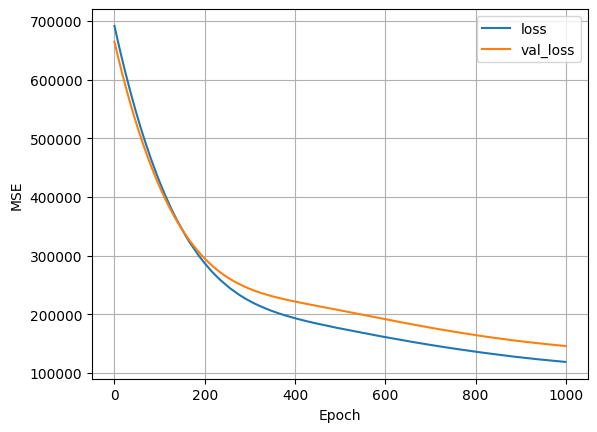

In [34]:
plot_loss(all_history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


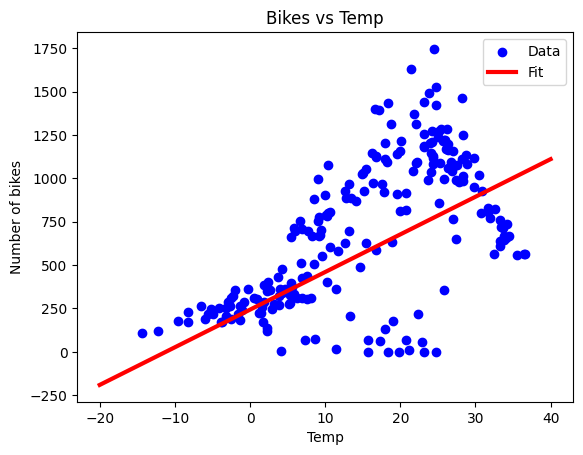

In [35]:
plt.scatter(X_train_temp, Y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [36]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [37]:
history = nn_model.fit(
    X_train_temp,
    Y_train_temp,
    verbose=0,
    epochs=100,
    validation_data=(X_valid_temp, Y_valid_temp)
)

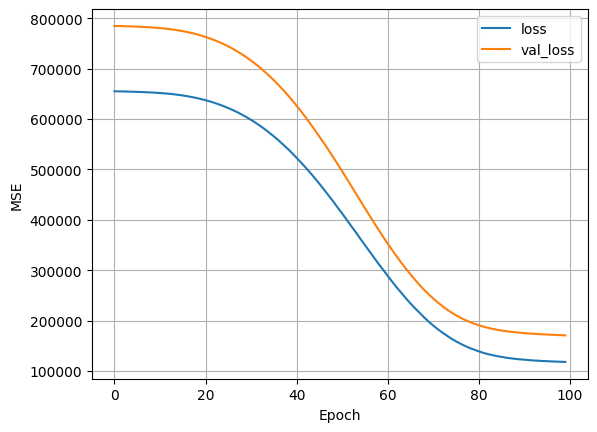

In [38]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


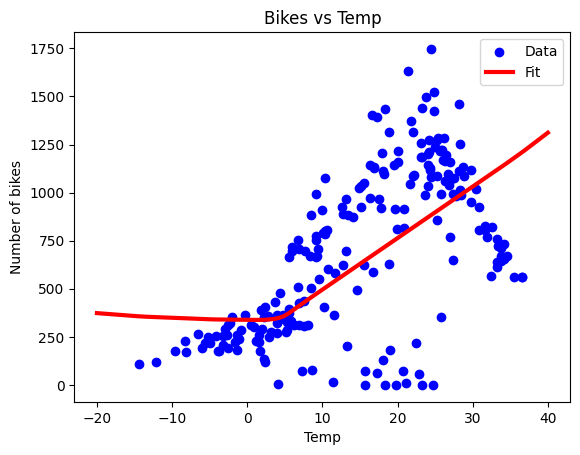

In [39]:
plt.scatter(X_train_temp, Y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()